In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras import Model,Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_x = np.load("train_x.npy")
train_y = np.load("train_y.npy")

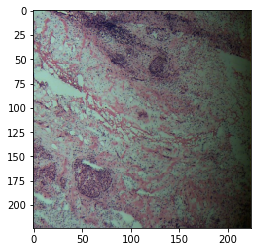

(299, 224, 224, 3)
(299,)


In [3]:
plt.imshow(train_x[0])
plt.show()
print(train_x.shape)
print(train_y.shape)

In [7]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_x, train_y, batch_size=20, epochs=5)

Train on 299 samples
Epoch 1/5
299/299 [==============================] - 13s 43ms/sample - loss: 1.1128 - accuracy: 0.3278
Epoch 2/5
299/299 [==============================] - 13s 44ms/sample - loss: 1.0995 - accuracy: 0.3010
Epoch 3/5
299/299 [==============================] - 13s 44ms/sample - loss: 1.0992 - accuracy: 0.3144
Epoch 4/5
299/299 [==============================] - 13s 44ms/sample - loss: 1.0997 - accuracy: 0.3211
Epoch 5/5
299/299 [==============================] - 14s 47ms/sample - loss: 1.0984 - accuracy: 0.3244


In [ ]:
l = np.array(his.history['loss'])
a = np.array(his.history['acc'])
step = np.linspace(1,40,40)
plt.plot(step,l,label="Train Loss")
plt.legend(loc='upper right')
plt.title('epoch-loss')
plt.xlim((0, 40))
plt.gca().set_ylim(bottom=0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()